# Итерационные методы решения линейных систем

## Метод простой итерации

Напишите программу для решения линейной системы с действительной матрицей $$ Ax = b, A = A^{T} > 0 $$ итерационным методом Ричардсона (методом релакции).

Требования к программе:
1. Программа должна содержать функцию, которая принимает на вход матрицу A, правую часть b, итерационный параметр τ максимальное число итераций и параметр tol, задающий критерий остановки для нормы невязки. Функция должна возвращать приближенное решение y, и одномерный массив со значениям нормы невязки на каждой итерации. Остановка должна происходить при норме невязки меньше заданного порога tol.
2. Программа должна создавать матрицу $A = A^{T}$ произвольного размера n, правую часть b.
3. Программа должна вычислять оценку собственных чисел с помощью кругов Гершгорина, и вычислять точные собственные числа с помощью готовой функции (например, numpy.linalg.eigvals).
4. Программа должна вычислять приближенное решение с помощью реализованной функции при 3-х различных значениях итерационного параметра:

(a) Произвольное значения из допустимой области

(b) Оптимальное значение, вычисленное по оценкам с.ч.

(c) Оптимальное значение, вычисленное по точным с.ч.

5. Программа должна выводить норму разницы между 3-мя приближенными решениями и точным решением, вычисленным с помощью готовой функции, например, numpy.linalg.solve.
6. Программа должна строить графики зависимости логарифма нормы невязки от номера итерации для 3-х значений итерационного параметра (на одном рисунке).
7. Автор программы должен уметь объяснить полученные результаты на основе изученной теории.

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from random import uniform

In [30]:
def solve_linear_system(A, b, tau, max_iter, tol):
    size = A.shape[0]
    I = np.eye(size)
    new_b = tau * b
    S = I - tau * A
    x_k = np.zeros(size)
    x_kp1 = np.zeros(size)
    it = 0
    err = np.array([])
    while (np.linalg.norm(A.dot(x_kp1) - b) > tol and it < max_iter):
        it += 1
        x_k[:] = x_kp1[:]
        for i in range(0, size):
            x_kp1[i] = new_b[i]
            for j in range(0, size):
                x_kp1[i] = x_kp1[i] + S[i, j] * x_k[j]
        err = np.append(err, np.linalg.norm(A.dot(x_kp1) - b))
    print it
    return x_kp1, err

Оценка минимального значения собственного числа с помощью кругов Гершгорина получается не совсем верной, так как могут получаться отрицательные значения для собственных чисел, что невозможно для симметричной положительно определенной матрицы. Поэтому могут получаться такие значения параметра tau, что метод Ричардсона не будет сходиться. Следовательно, я ограничил минимальное значение собственного числа нулем. Таким образом, в функции ниже я возвращаю значение $\tau$, равное $2 / \lambda_{max}$, где $\lambda_{max}$ - оцененное сверху максимальное значение собственного числа матрицы A. Оно точно не меньше, чем реальное значение максимального собтвенного числа, поэтому возвращаемое значение параметра $\tau$ попадает в допустимый диапазон и метод сходится. 

In [31]:
#function that return value of tau using gershgorin circles
def gershgorin_circles_opt_value(A):
    #array of sums of absolute values of elements in lines except diagonal elements 
    r = np.array([])
    for i in range(0, size):
        r_i = 0
        for j in range(0, size):
            if (i != j):
                r_i += np.abs(A[i, j])
        r = np.append(r, r_i)
        
    #array of sums of absolute values of elements in columns except diagonal elements
    c = np.array([])
    for j in range(0, size):
        c_j = 0
        for i in range(0, size):
            if (i != j):
                c_j += np.abs(A[i, j])
        c = np.append(c, c_j)

    #make array of possible eigenvalues (range of eigenvalues)
    eigenvalues = np.array([])
    for i in range(0, size):
        eigenvalues = np.append(eigenvalues, A[i, i] - c[i])
        eigenvalues = np.append(eigenvalues, A[i, i] + c[i])
        eigenvalues = np.append(eigenvalues, A[i, i] - r[i])
        eigenvalues = np.append(eigenvalues, A[i, i] + r[i])
    
    #return optimal value
    return 2. / np.max(eigenvalues)

Optimal value of tau using standart function np.linalg.eigvals: 0.271682917374
Optimal value of tau using Gershgorin circles: 0.268857830136
Random value of tau in allowable interval: 0.0453021390926
Python solution using np.linalg.solve: [-0.11050596  0.16625247  0.33131419 -0.05295607]
29
Solution using Richardson method with optimal value of tau (standart function): [-0.11050575  0.16626071  0.33130974 -0.05293726]
27
Solution using Richardson method with optimal value of tau (Gershgorin circles): [-0.11051276  0.16626032  0.33129971 -0.05292381]
161
Solution using Richardson method with random value of tau (random tau in interval): [-0.11053906  0.16624901  0.33126298 -0.05288341]
Euclidean norm of the difference of two solutions (x_my - x_py): 2.10162960116e-05
Euclidean norm of the difference of two solutions (x_my_circles - x_py): 3.68601092854e-05
Euclidean norm of the difference of two solutions (x_my_rand - x_py): 9.49203486667e-05


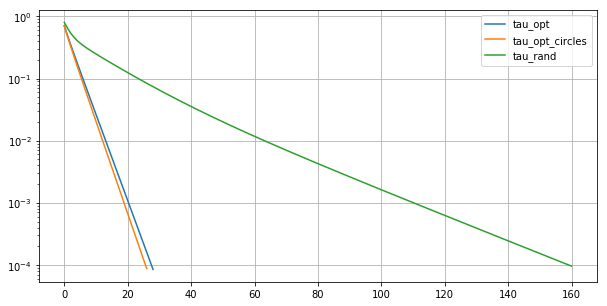

In [32]:
#initialize matrix A, vector b, tolerance level = tol and maximum number of iterations
size = 4
B = np.random.rand(size, size)
C = np.copy(B)
A = np.dot(C.T, B) + np.eye(size)
tol = 1e-4
max_iter = 1e5
b = np.array([np.random.rand() for i in range(size)])

#find optimal value of tau parameter using standart function np.linalg.eigvals
eigvals = np.linalg.eigvals(A)
tau_opt = 2. / (np.max(eigvals) + np.min(eigvals))
print("Optimal value of tau using standart function np.linalg.eigvals: {}".format(tau_opt))

#find optimal value of tau parameter using Gershgorin circles
tau_opt_circles = gershgorin_circles_opt_value(A)
print("Optimal value of tau using Gershgorin circles: {}".format(tau_opt_circles))

#random value of tau parameter in interval (0, 2 / lambda_max)
tau_rand = uniform(0, 2 / np.max(eigvals))
print("Random value of tau in allowable interval: {}".format(tau_rand))

#solution using standart function np.linalg.solve
x_py = np.linalg.solve(A, b)
print("Python solution using np.linalg.solve: {}".format(x_py))

#solution using Richardson method with tau_opt
x_my, err_my = solve_linear_system(A, b, tau_opt, max_iter, tol)
print("Solution using Richardson method with optimal value of tau (standart function): {}".format(x_my))

#solution using Richardson method with tau_opt_circles
x_my_circles, err_my_circles = solve_linear_system(A, b, tau_opt_circles, max_iter, tol)
print("Solution using Richardson method with optimal value of tau (Gershgorin circles): {}".format(x_my_circles))

#solution using Richardson method with tau_rand
x_my_rand, err_my_rand = solve_linear_system(A, b, tau_rand, max_iter, tol)
print("Solution using Richardson method with random value of tau (random tau in interval): {}".format(x_my_rand))

print("Euclidean norm of the difference of two solutions (x_my - x_py): {}"
      .format(np.linalg.norm(x_my - x_py)))
print("Euclidean norm of the difference of two solutions (x_my_circles - x_py): {}"
      .format(np.linalg.norm(x_my_circles - x_py)))
print("Euclidean norm of the difference of two solutions (x_my_rand - x_py): {}"
      .format(np.linalg.norm(x_my_rand - x_py)))

fig, ax = plt.subplots(figsize = (10, 5))
ax.semilogy(err_my, label = 'tau_opt')
ax.semilogy(err_my_circles, label = 'tau_opt_circles')
ax.semilogy(err_my_rand, label = 'tau_rand')
ax.grid(True)
ax.legend(loc = 'best')